importing Jupyter notebook from Clustering.ipynb
[35595705761882.914, 13532547086530.379, 7642616885048.815, 4275788542537.2837, 2810480281684.533, 1942331094130.105, 1334153418279.0647, 1008934533225.3286, 760931504156.4761, 620016761299.4514]


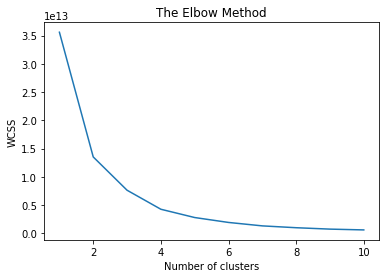

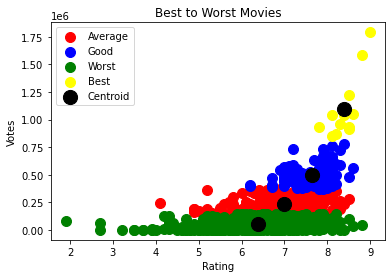

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb   #Used to display output of imported .ipynb files
import Clustering   #Importing Clustering.ipynb file to show the outputs of Cluster
import sys

# Taking input from user

In [2]:
def get_key(val): 
    for key, value in list1.items(): 
         if val == value: 
             return key 
  
    return 
list1 = {2:"Action",3:"Adventure",4:"Animation",5:"Biography",6:"Comedy",7:"Crime",8:"Drama",9:"Family",10:"Fantasy",11:"History",12:"Horror",13:"Music",14:"Musical",15:"Mystery",16:"Romance",17:"Sci-Fi",18:"Sport",19:"Thriller",20:"War",21:"Western"}  
list2=['Action',"Adventure","Animation","Biography","Comedy","Crime","Drama","Family","Fantasy","History","Horror","Music","Musical","Mystery","Romance","Sci-Fi","Sport","Thriller","War","Western"]   
x_input=input('Enter the genre of your choice')
while x_input not in list2:
    print('Enter first letter capital or enter a correct genre')
    x_input=input('Enter the genre of your choice')
col=get_key(x_input)
print(col)

Enter the genre of your choiceAction
2


In [3]:
dataset = pd.read_csv('IMDB-Movie-Data.csv')
print(dataset)

     Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley 

# Sorting values according to rating in descending order

In [4]:
dataset = dataset.sort_values('Rating',ascending=False)
x= dataset.iloc[:,[2,8]]
print(x)

                        Genre  Rating
54         Action,Crime,Drama     9.0
80    Action,Adventure,Sci-Fi     8.8
117    Action,Biography,Drama     8.8
36     Adventure,Drama,Sci-Fi     8.6
96    Animation,Drama,Fantasy     8.6
..                        ...     ...
968    Action,Horror,Thriller     3.5
647   Fantasy,Horror,Thriller     3.2
871  Action,Adventure,Fantasy     2.7
42                     Horror     2.7
829                    Comedy     1.9

[1000 rows x 2 columns]


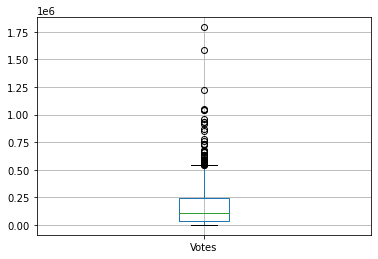

In [5]:
dataset.boxplot(column=['Votes'])

# Encoding Genre using pd.str_get_dummies()

In [6]:
x = pd.concat([x.drop('Genre', 1), x['Genre'].str.get_dummies(sep=",")], 1)
print(x)

     Rating  Action  Adventure  Animation  Biography  Comedy  Crime  Drama  \
54      9.0       1          0          0          0       0      1      1   
80      8.8       1          1          0          0       0      0      0   
117     8.8       1          0          0          1       0      0      1   
36      8.6       0          1          0          0       0      0      1   
96      8.6       0          0          1          0       0      0      1   
..      ...     ...        ...        ...        ...     ...    ...    ...   
968     3.5       1          0          0          0       0      0      0   
647     3.2       0          0          0          0       0      0      0   
871     2.7       1          1          0          0       0      0      0   
42      2.7       0          0          0          0       0      0      0   
829     1.9       0          0          0          0       1      0      0   

     Family  Fantasy  ...  Horror  Music  Musical  Mystery  Rom

In [7]:
X = x.iloc[:,0:21].values

In [8]:
x1=dataset.iloc[:,[0,2,8]]
x1 = pd.concat([x1.drop('Genre', 1), x1['Genre'].str.get_dummies(sep=",")], 1)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)#SInce we do not know how many eigen vectors are needed we keep value of n components=None so that we can get the eigen values of all the eigen vectors to figure out the best one
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.33238783 0.14317095 0.10089998 0.0705231  0.05540225 0.0459295
 0.03789689 0.03530911 0.03500896 0.02613341 0.02515884 0.02438035
 0.01652608 0.01301041 0.01021592 0.00877265 0.00573457 0.00520926
 0.00417902 0.00240437 0.00174652]


In [10]:
np.set_printoptions(precision=2)
print(X)

[[-2.29e+00  2.63e-01 -5.17e-01 ... -4.49e-02 -2.25e-03 -1.07e-02]
 [-1.87e+00  1.59e+00 -1.47e-01 ... -2.09e-02 -1.38e-02 -1.34e-03]
 [-2.15e+00  2.38e-01 -3.57e-01 ... -3.96e-02 -1.30e-03 -6.62e-03]
 ...
 [ 4.06e+00  5.71e-01 -1.62e-01 ...  2.73e-02 -2.60e-04  8.54e-03]
 [ 4.06e+00 -6.30e-01 -1.74e-01 ... -2.81e-02 -2.25e-02 -9.17e-03]
 [ 4.77e+00 -7.58e-01  6.74e-01 ... -2.09e-02 -2.54e-02 -3.07e-03]]


In [11]:
y= dataset.iloc[:,0].values
print(y)

[  55   81  118   37   97  250  134   65  100  992  125  477  635  431
  862  145    7  456  500   78  689  479   27  766   83  242  646  714
  743   17  195  144  231  155  193  428   68   75   77  146   84   91
  199   93  239  137  335  300  112  115  198  139    1  773  642   19
  696  609   51  165  670  333  103  686  262  274  366  641  130   20
  236  141  163   34  174  469  185  490  448  171  247   22  898  253
  104  695  172  753  599  201  505  272  204   36  657  519  160   82
   13  904  550  815  233  471  486  224  449  256  261  951  206  217
  271  143  510  794  591  960  511  848  840  786  408  692  363  360
   88   89  189  411  860  339  564  337  760  574  418  312  426  385
   12  659  663  685  484  220  890  735  278  294  311  325  350  358
  364  404  419  508  443  475  871  347   66  106  114  110   14  958
  579  148  712  728  612  241  246  258  585  744  282   38  980  855
  461  378  381  384  438  816  818  149  829  687  177  673  154  464
  126 

# SVM Classifier


In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
y_pred = classifier.predict(X)#Predicting the rank of movies

In [14]:
data_svm=[]
i=0
for j in range(0,1000):
    try:
        if(x1[x1.Rank==y_pred[j]][x_input].values[0]==1):
            
            list_svm=[]
            list_svm.append(dataset[dataset.Rank==y_pred[j]]['Title'].values[0])
            list_svm.append(dataset[dataset.Rank==y_pred[j]]['Genre'].values[0])
            list_svm.append(dataset[dataset.Rank==y_pred[j]]['Rating'].values[0])
            data_svm.append(list_svm)
            list_svm=None
            i+=1
        if i==10:
            break
        else:
            pass
    except IndexError:
        break

# Recommending Movies using SVM

In [15]:
!{sys.executable} -m pip install columnar
from columnar import columnar
print('Your Input genre is ',x_input)
print('Recommending best movies of ',x_input,' Genre : \n\n')
headers = ['Title', 'Genres', 'Rating']
data_svm = sorted(data_svm,key=lambda lr:lr[2], reverse=True)
table = columnar(data_svm, headers, no_borders=False)
print(table)

Your Input genre is  Action
Recommending best movies of  Action  Genre : 


|-----------------------|-----------------------|------|
|Title                  |Genres                 |Rating|
|======================================================|
|The Dark Knight        |Action,Crime,Drama     |9.0   |
|-----------------------|-----------------------|------|
|Inception              |Action,Adventure,Sci-Fi|8.8   |
|-----------------------|-----------------------|------|
|Dangal                 |Action,Biography,Drama |8.8   |
|-----------------------|-----------------------|------|
|The Dark Knight Rises  |Action,Thriller        |8.5   |
|-----------------------|-----------------------|------|
|Bahubali: The Beginning|Action,Adventure,Drama |8.3   |
|-----------------------|-----------------------|------|
|Warrior                |Action,Drama,Sport     |8.2   |
|-----------------------|-----------------------|------|
|The Bourne Ultimatum   |Action,Mystery,Thriller|8.1   |
|-----------

In [16]:
print(data_svm)

[['The Dark Knight', 'Action,Crime,Drama', 9.0], ['Inception', 'Action,Adventure,Sci-Fi', 8.8], ['Dangal', 'Action,Biography,Drama', 8.8], ['The Dark Knight Rises', 'Action,Thriller', 8.5], ['Bahubali: The Beginning', 'Action,Adventure,Drama', 8.3], ['Warrior', 'Action,Drama,Sport', 8.2], ['The Bourne Ultimatum', 'Action,Mystery,Thriller', 8.1], ['Mad Max: Fury Road', 'Action,Adventure,Sci-Fi', 8.1], ['The Avengers', 'Action,Sci-Fi', 8.1], ['Rush', 'Action,Biography,Drama', 8.1]]


In [17]:
import sklearn.metrics as met
from sklearn.metrics import accuracy_score
print(met.r2_score(y,y_pred))
print(met.mean_squared_error(y,y_pred))
print(accuracy_score(y,y_pred))

0.5659642339642339
36169.611
0.79


# Plot of original movies in dataset vs predicted movies(ALL Genres)

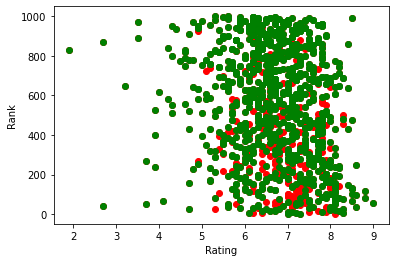

In [18]:
x2=x.iloc[:,[0]].values
plt.scatter(x2,y,color='red')#original movies(entire set)
plt.scatter(x2,y_pred,color='green')#predicted movies(entire set)
plt.xlabel('Rating')
plt.ylabel('Rank')
plt.show()

# KNN Algorithm

In [19]:
X_KNN = x1.values
print(X_KNN)

[[ 55.    9.    1.  ...   0.    0.    0. ]
 [ 81.    8.8   1.  ...   0.    0.    0. ]
 [118.    8.8   1.  ...   0.    0.    0. ]
 ...
 [872.    2.7   1.  ...   0.    0.    0. ]
 [ 43.    2.7   0.  ...   0.    0.    0. ]
 [830.    1.9   0.  ...   0.    0.    0. ]]


In [20]:
#preparing training data with input Genre
x_test = []
y_test = []
#Getting ranks
Ranks  = []
for i in range(0,len(X_KNN)):
    if X_KNN[i,col]==1:
        Ranks.append(X_KNN[i,0])
        x_test.append(X_KNN[i,1:])
        y_test.append(X_KNN[i,0])
x_test=np.array(x_test)
y_test=np.array(y_test)
y_test=y_test.ravel()

In [21]:
X_train_predict = x_test.copy()
Y_train_predict = y_test.copy()

In [22]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_predict = sc.fit_transform(X_train_predict)

In [23]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [24]:
classifier_knn = KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier_knn.fit(X_train_predict,Y_train_predict)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
#Predicting
Y_pred_predict = classifier_knn.predict(X_train_predict)
print(Y_pred_predict)

[ 55.  81. 118. 125.  27. 195. 428.  68.  77. 335.  68. 773.  51. 165.
 141. 141.  34. 469. 201. 201. 201. 160. 201. 904. 233. 449. 206. 206.
 271. 206.  88. 411. 760. 449. 220.  66. 114. 579. 148. 241. 258. 282.
  38. 855. 829. 177. 154. 466. 159. 291. 302. 124.  90.  95. 434.  96.
 434.  90. 320. 105. 332. 169. 105. 939. 600. 320.  79.  70. 512.  85.
  85.  85.  70. 280. 273. 604. 699.  76. 738. 447. 386. 135.   9. 703.
 213. 738. 403. 703.  76. 213. 895. 703. 893. 896. 213. 493. 537. 661.
 533. 433. 451. 800. 610. 661. 610. 369. 229. 316. 610. 610. 451. 178.
 451. 276. 618. 492. 518. 492. 559.  39. 196. 870. 781. 729. 421. 729.
 577. 578. 453. 845. 372. 578. 845. 170. 601. 388. 221. 767. 811. 221.
 221. 677. 221. 221.  18. 627. 627. 324. 470. 221. 530. 374. 742. 597.
 991. 664. 917. 764. 917. 409. 527. 664. 341. 341. 857. 409. 991. 936.
 970. 561. 427. 167. 454. 705. 782. 244. 176. 705. 945. 921. 435. 401.
 945. 529. 529. 622. 435. 343.  15. 945. 467. 435. 754. 922. 501. 485.
 543. 

In [26]:
#Checking accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy :',accuracy_score(Y_train_predict,Y_pred_predict))

r2 = met.r2_score(Y_train_predict,Y_pred_predict)
print('R-square_score : ',r2)

mse = met.mean_squared_error(Y_train_predict,Y_pred_predict) 
print('MSE : ',mse)

rmse = np.sqrt(mse)
print('RMSE : ',rmse)

Accuracy : 0.7755775577557755
R-square_score :  0.674491469927109
MSE :  24725.102310231025
RMSE :  157.24217726243498


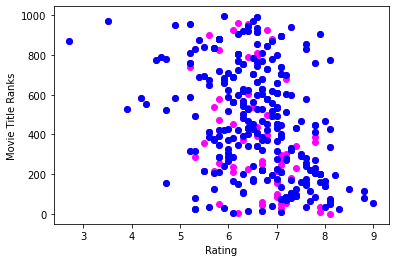

In [27]:
#Plotting predicted Rank with respect to original Rating
plt.scatter(x_test[:,0],Y_train_predict,color='magenta')#original rank
plt.scatter(x_test[:,0],Y_pred_predict,color='blue')#predicted rank
plt.xlabel('Rating')
plt.ylabel('Movie Title Ranks')
plt.show()

In [28]:
# Recommendation using Nearest Neighbor
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6,metric='cosine',algorithm='brute').fit(X)

In [29]:
distances , indices = nbrs.kneighbors(X,n_neighbors=100)

In [30]:
data = list()

In [31]:
#Function to get index of input Movie Title
def get_index(title):
    return dataset[dataset["Title"]==title].index.values.astype(int)[0]

#Function to print Similar movies based on distances
def print_similar_movies(query=None):
   global data
   if query:
      found_id = get_index(query)          
      for id in indices[found_id][0:]:
          if x.loc[id][x_input] == 1:
            if dataset.loc[id]["Rating"] > 6.5:
              list3=[]
              list3.append(dataset.loc[id]["Title"])
              list3.append(dataset.loc[id]["Genre"])
              list3.append(dataset.loc[id]["Rating"])
              list3.append(x.loc[id][x_input]) 
              data.append(list3)  
              list3 = None  

In [32]:
rank = Ranks[0]
movie_input = np.array(dataset[dataset['Rank']==rank].Title)
movie = movie_input[0]

In [33]:
title = np.array(dataset[dataset['Rank']==rank].index)
print(title)

[54]


In [34]:
print_similar_movies(movie)

# Recommending movies using KNN 

In [35]:
from columnar import columnar
print('Your Input genre is ',x_input)
print('Recommending best movies of ',x_input,' Genre : \n\n')
headers = ['Title', 'Genres', 'Rating', 'Is {}'.format(x_input)]
data = sorted(data,key=lambda lr:lr[2], reverse=True)
table = columnar(data, headers, no_borders=False)
print(table)

Your Input genre is  Action
Recommending best movies of  Action  Genre : 


|----------------------------------|--------------------------|------|---------|
|Title                             |Genres                    |Rating|Is Action|
|==============================================================================|
|The Dark Knight                   |Action,Crime,Drama        |9.0   |1.0      |
|----------------------------------|--------------------------|------|---------|
|Inception                         |Action,Adventure,Sci-Fi   |8.8   |1.0      |
|----------------------------------|--------------------------|------|---------|
|Bahubali: The Beginning           |Action,Adventure,Drama    |8.3   |1.0      |
|----------------------------------|--------------------------|------|---------|
|The Avengers                      |Action,Sci-Fi             |8.1   |1.0      |
|----------------------------------|--------------------------|------|---------|
|Guardians of the Galaxy         